# Tensorflow

In [6]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("bisiklet_fiyatlari.xlsx")
data.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


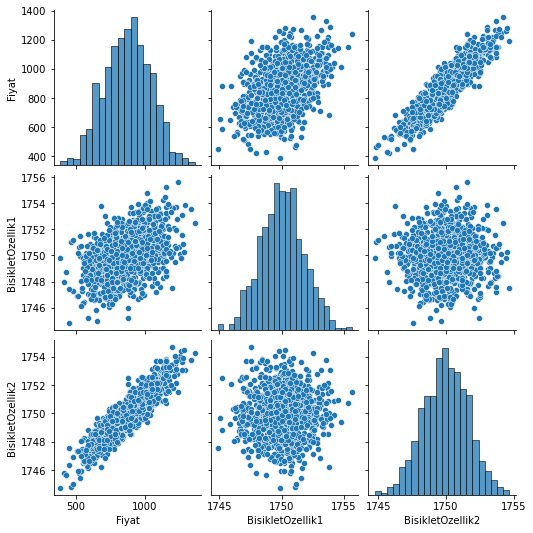

In [8]:
sbn.pairplot(data)

## test / train

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = data["Fiyat"].values
# y >> label
# y = wx arti b :) 
x = data[["BisikletOzellik1","BisikletOzellik2"]].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=15)

In [13]:
X_train.shape

(670, 2)

In [14]:
X_test.shape

(330, 2)

In [15]:
y_train

array([ 928.6952754, 1263.961903 ,  539.3910047,  909.0602356,
        827.5599926,  755.0897782,  871.0148095,  987.1951914,
       1072.273843 ,  694.625345 ,  750.4756224,  705.8022573,
        937.9704699,  699.7664082,  836.6511441,  957.4757753,
        692.5542986,  879.9817511, 1083.133861 ,  961.2584546,
        799.7283271,  890.4446699, 1043.475329 ,  581.3983762,
        921.2831591,  904.7251741,  749.7572009,  871.8325006,
        965.3876743, 1055.197693 , 1042.743866 ,  766.9644604,
       1129.98977  ,  775.1337641,  889.7252105,  704.0185578,
        937.2014327,  601.5369815, 1068.018878 ,  864.2491913,
        845.4859474, 1028.047418 ,  659.9882841,  812.2027726,
       1116.252739 ,  862.5282243,  888.309265 ,  781.6579817,
        988.8845581,  908.5516566,  811.7080229,  927.5018276,
        833.1474785, 1026.479661 , 1078.893552 ,  717.4170105,
        885.0577122,  836.6405309,  955.8568831, 1149.145803 ,
        806.2158674,  707.2491908, 1093.736882 ,  720.3

In [16]:
y_test.shape

(330,)

In [17]:
# scaling (buyutmek ve kucultmek)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train)

MinMaxScaler()

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

# mse: the mean squared error tells u how close a REGRESSION LINE

model.compile(optimizer = "rmsprop", loss = "mse")

# batch size : use it... if u have big data ( 100 000 ) it will give some trouble 

In [27]:
model.fit(X_train,y_train, epochs=250)

Train on 670 samples
Epoch 1/250
670/670 [==============================] - 2s 3ms/sample - loss: 795029.7563
Epoch 2/250
670/670 [==============================] - 0s 130us/sample - loss: 794397.9410
Epoch 3/250
670/670 [==============================] - 0s 142us/sample - loss: 793727.9522
Epoch 4/250
670/670 [==============================] - 0s 161us/sample - loss: 792982.6541
Epoch 5/250
670/670 [==============================] - 0s 136us/sample - loss: 792163.3966
Epoch 6/250
670/670 [==============================] - 0s 140us/sample - loss: 791269.0351
Epoch 7/250
670/670 [==============================] - 0s 140us/sample - loss: 790295.7386
Epoch 8/250
670/670 [==============================] - 0s 133us/sample - loss: 789218.5004
Epoch 9/250
670/670 [==============================] - 0s 154us/sample - loss: 788021.9631
Epoch 10/250
670/670 [==============================] - 0s 161us/sample - loss: 786693.3397
Epoch 11/250
670/670 [==============================] - 0s 158us/sampl

Epoch 181/250
670/670 [==============================] - 0s 182us/sample - loss: 75.5013
Epoch 182/250
670/670 [==============================] - 0s 166us/sample - loss: 75.0718
Epoch 183/250
670/670 [==============================] - 0s 172us/sample - loss: 74.4785
Epoch 184/250
670/670 [==============================] - 0s 203us/sample - loss: 74.9820
Epoch 185/250
670/670 [==============================] - 0s 206us/sample - loss: 76.1718
Epoch 186/250
670/670 [==============================] - 0s 173us/sample - loss: 74.5980
Epoch 187/250
670/670 [==============================] - 0s 197us/sample - loss: 75.0635
Epoch 188/250
670/670 [==============================] - 0s 181us/sample - loss: 76.0278
Epoch 189/250
670/670 [==============================] - 0s 193us/sample - loss: 75.5485
Epoch 190/250
670/670 [==============================] - 0s 187us/sample - loss: 74.4621
Epoch 191/250
670/670 [==============================] - 0s 182us/sample - loss: 74.7155
Epoch 192/250
670/670

In [31]:
loss = model.history.history["loss"]

<AxesSubplot:>

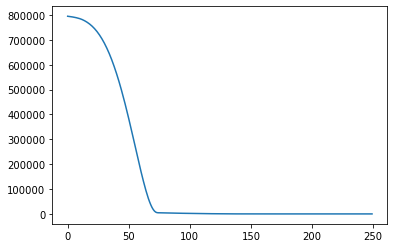

In [32]:
sbn.lineplot(x=range(len(loss)), y=loss)

In [34]:
# kayip olcme

trainLoss = model.evaluate(X_train,y_train, verbose=0)

In [35]:
testLoss = model.evaluate(X_test, y_test, verbose=0)

In [36]:
trainLoss

81.00081748393045

In [37]:
testLoss

74.80769551595053

In [39]:
testPredict = model.predict(X_test)

In [40]:
testPredict

array([[1081.158  ],
       [ 625.79126],
       [ 878.8644 ],
       [ 896.9092 ],
       [ 902.16547],
       [ 452.76312],
       [ 934.01654],
       [ 994.4743 ],
       [ 944.22375],
       [1019.93604],
       [ 753.30566],
       [ 920.8081 ],
       [ 950.3699 ],
       [1058.0067 ],
       [1125.0468 ],
       [ 683.6597 ],
       [1130.3923 ],
       [ 652.8397 ],
       [1158.0874 ],
       [ 889.32117],
       [ 895.59045],
       [ 719.0972 ],
       [ 458.39417],
       [ 613.8164 ],
       [ 837.6542 ],
       [1094.6553 ],
       [ 715.9712 ],
       [ 759.20703],
       [ 876.12915],
       [ 772.9907 ],
       [ 452.63074],
       [ 785.54614],
       [ 730.53705],
       [ 648.77014],
       [ 889.4628 ],
       [ 846.40735],
       [1038.9832 ],
       [1025.9158 ],
       [ 847.5893 ],
       [ 864.86487],
       [ 759.5141 ],
       [1178.1865 ],
       [1101.0342 ],
       [1091.2275 ],
       [ 875.9935 ],
       [ 598.48834],
       [1149.2034 ],
       [ 976.

In [41]:
predictDF = pd.DataFrame(y_test, columns=["real y"])

In [42]:
predictDF

,real y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [43]:
testPredict.shape

(330, 1)

In [45]:
testPredict = pd.Series(testPredict.reshape(330,))

In [46]:
testPredict

0      1081.157959
1       625.791260
2       878.864380
3       896.909180
4       902.165466
          ...     
325    1016.743286
326     793.202698
327     768.391357
328    1171.267944
329     805.139587
Length: 330, dtype: float32

In [47]:
predictDF = pd.concat([predictDF, testPredict], axis=1)

In [48]:
predictDF

,real y,0
0,1081.652164,1081.157959
1,622.675990,625.791260
2,889.356810,878.864380
3,902.826733,896.909180
4,897.662404,902.165466
...,...,...
325,1028.438035,1016.743286
326,789.934950,793.202698
327,758.490486,768.391357
328,1172.871659,1171.267944


In [49]:
predictDF.columns = ["real y", "predict y"]

In [50]:
predictDF

,real y,predict y
0,1081.652164,1081.157959
1,622.675990,625.791260
2,889.356810,878.864380
3,902.826733,896.909180
4,897.662404,902.165466
...,...,...
325,1028.438035,1016.743286
326,789.934950,793.202698
327,758.490486,768.391357
328,1172.871659,1171.267944


<AxesSubplot:xlabel='real y', ylabel='predict y'>

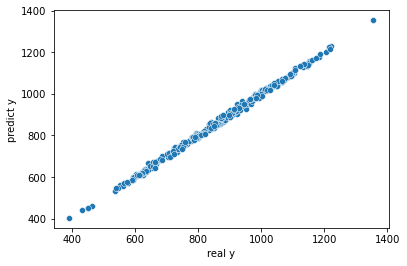

In [51]:
sbn.scatterplot(x= "real y", y= "predict y", data= predictDF)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(predictDF["real y"], predictDF["predict y"])

6.9269312005397685

In [54]:
mean_squared_error(predictDF["real y"], predictDF["predict y"])

74.80769740840555

In [55]:
data.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [59]:
yeniBisikletOzellikleri = [[1760,1768]]

In [60]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [61]:
model.predict(yeniBisikletOzellikleri)

array([[2878.4397]], dtype=float32)

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save("bisikletModeli.h5")

In [64]:
sonradanCargrilanModel = load_model("bisikletModeli.h5")

In [65]:
sonradanCargrilanModel.predict(yeniBisikletOzellikleri)

array([[2878.4397]], dtype=float32)